Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

   Malignant       1.00      0.93      0.96        44
      Benign       0.96      1.00      0.98        70

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
[[41  3]
 [ 0 70]]


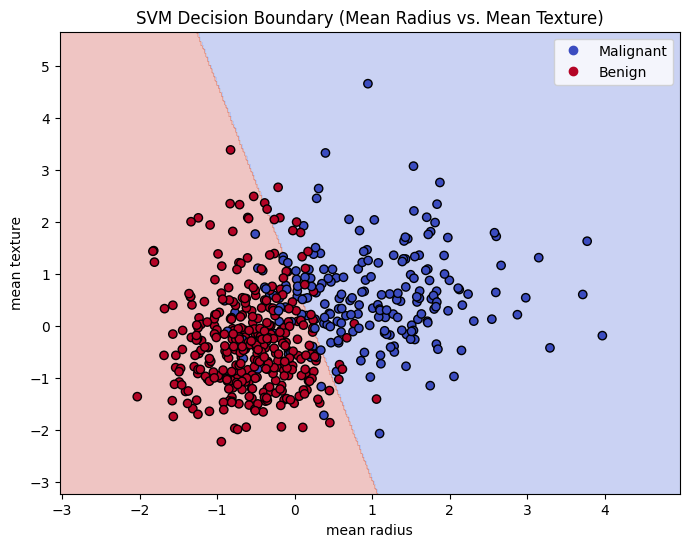

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

# Load dataset
data = load_breast_cancer()
X = data.data  # All features for training
y = data.target  # Binary labels (0: malignant, 1: benign)
X_viz = X[:, [0, 1]]  # First two features: mean radius, mean texture

# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)
X_train_viz, X_test_viz = train_test_split(X_viz, y, test_size=0.2, random_state=46)[:2]

# Scale features (SVM is sensitive to feature scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_viz_scaled = scaler.fit_transform(X_viz)  # For visualization

# Initialize SVM with linear kernel for binary classification
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on all scaled features
svm_model.fit(X_train_scaled, y_train)

# Predict on test set
predictions = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Detailed evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=['Malignant', 'Benign']))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

def plot_decision_boundary(X_scaled, y, model, feature_names):
    # Create a mesh grid for plotting
    h = 0.02  # Step size
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and data points
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('SVM Decision Boundary (Mean Radius vs. Mean Texture)')
    plt.legend(handles=scatter.legend_elements()[0], labels=['Malignant', 'Benign'])
    plt.show()

# Train a separate SVM model for visualization (using only two features)
svm_viz = SVC(kernel='linear', C=1.0, random_state=42)
svm_viz.fit(X_viz_scaled, y)

# Plot decision boundary
plot_decision_boundary(X_viz_scaled, y, svm_viz, data.feature_names[:2])